##SHARMILA GOWRI VELUGULA : [ku3936]

#**JENA Flowers Dataset: Image Classification using CNN**

Required: 
* JF30-1 unzip folder should be uploaded to the google drive
* Drive is mounted at '/content/drive'


Classifying 30 different classes of flowers present in Jena Flowers Dataset using Convolutional Neural Network model.

Imported class labels and images from drive. Preprocessed the data and partitioned into Training data and Validation data.
Trained a model using CNN for classification of 30 different classes. Used data augmentation to the training images and built a predictive model which will predict class of the flower.



#Libraries

In [78]:
#Imported required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)

2.3.0


In [79]:
#mounted drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Loading

In [80]:
# import class labels
col_names = ['image','label']
df = pd.read_csv('/content/drive/My Drive/JF30-1/classlabels.txt', header =None, names = col_names)
df = df.sort_values(by='image')
df

,image,label
0,JFT_00001.jpg,1
1,JFT_00002.jpg,1
2,JFT_00003.jpg,1
3,JFT_00004.jpg,1
558,JFT_00005.jpg,1
...,...,...
555,JFT_01475.jpg,30
1477,JFT_01476.jpg,30
1478,JFT_01477.jpg,30
556,JFT_01478.jpg,30


In [81]:
#import images
import os
directory ='/content/drive/My Drive/JF30-1/jpg'
images = sorted(os.listdir(directory))
len(images)

1479

In [82]:
#if any duplicates are getting imported while uploading images
b = ['(1)']
for i in images:
    for x in b:
        if x in i:
            images.remove(i)

len(images)

1479

#Pre - Processing

In [83]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [84]:
#resizing images and storing in a list
x =[]
for i in images: 
  path = os.path.join(directory, i)
  img = load_img(path, color_mode = 'rgb', target_size = (32,32))
  re_img=img_to_array(img).astype('float32')/255


  x.append(re_img)

In [85]:
#Converting images and class labels to arrays
x=np.array(x)
y=np.array(df['label'])

In [86]:
#As class label has 30 different classes,one hot encoding is performed
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
y=pd.DataFrame(enc.fit_transform(df[['label']]).toarray())
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#Image Classification - Train and Valid data

###Data Partitioning

In [87]:
#Split images(x) and classnames(y) into training data and validation data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25,random_state=42)

In [88]:
#Copy train and valid data
x_train1 = x_train.copy()
y_train1 = y_train.copy()
x_valid1 = x_valid.copy()
y_valid1 = y_valid.copy()

In [89]:
#labels shape
y_train1.shape,y_valid1.shape

((1109, 30), (370, 30))

In [90]:
#images shape
x_train1.shape,x_valid1.shape

((1109, 32, 32, 3), (370, 32, 32, 3))

###Checking training images

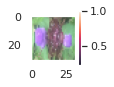

In [91]:
#verifying the training images
plt.figure(figsize = (1,1))
img1 = x_train1[1]
plt.imshow(img1)
plt.colorbar()
plt.grid(False)

In [92]:
#verifying training label
y_train1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
1328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


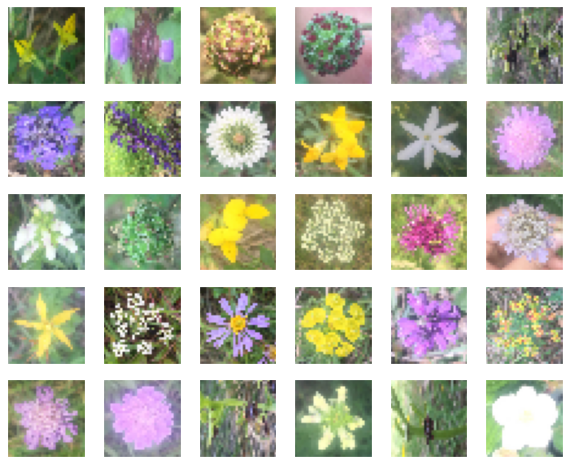

In [93]:
#displaying all the classes images
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train1[i], cmap=plt.cm.binary)
   

In [94]:
x_train1.shape[1:]

(32, 32, 3)

6     70
28    68
23    67
13    66
4     66
2     65
7     64
18    63
29    63
20    61
27    61
24    60
10    60
25    56
19    55
14    54
5     54
22    49
12    48
9     46
17    45
3     41
21    38
11    36
26    35
8     28
16    24
15    13
30    12
1     11
Name: label, dtype: int64



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


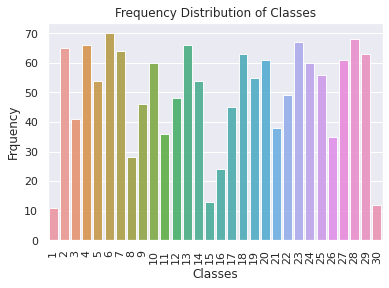

In [95]:
#Classes frequency
Class_Frequency_Count = df['label'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Frquency", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()
# we see that class 6 has the highest number of occurances which is 70 

# Build Base Model

Model Layout:

In [96]:
    # # model layout using a CNN.
    model = Sequential()

    model.reset_states()
    tf.keras.backend.clear_session()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train1.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 30
    model.add(Dense(30))
    model.add(Activation('softmax'))

Summary of the Model:

In [97]:
#Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)       

Compile the Model:

In [98]:
#Compiling the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Fit the Model:

In [99]:
#Fit the model on validation data
history = model.fit(x_train1, y_train1, batch_size=128, validation_data = (x_valid1, y_valid1), epochs=20)

Epoch 1/20
9/9 [==============================] - 4s 428ms/step - loss: 3.3822 - accuracy: 0.0370 - val_loss: 3.3589 - val_accuracy: 0.0568
Epoch 2/20
9/9 [==============================] - 4s 411ms/step - loss: 3.3261 - accuracy: 0.0730 - val_loss: 3.3184 - val_accuracy: 0.0622
Epoch 3/20
9/9 [==============================] - 4s 416ms/step - loss: 3.1838 - accuracy: 0.1055 - val_loss: 3.0231 - val_accuracy: 0.0757
Epoch 4/20
9/9 [==============================] - 4s 404ms/step - loss: 2.9411 - accuracy: 0.1172 - val_loss: 2.8165 - val_accuracy: 0.1757
Epoch 5/20
9/9 [==============================] - 4s 404ms/step - loss: 2.7598 - accuracy: 0.1533 - val_loss: 2.6064 - val_accuracy: 0.1784
Epoch 6/20
9/9 [==============================] - 4s 418ms/step - loss: 2.5698 - accuracy: 0.1867 - val_loss: 2.3704 - val_accuracy: 0.3135
Epoch 7/20
9/9 [==============================] - 4s 409ms/step - loss: 2.4235 - accuracy: 0.2561 - val_loss: 2.2285 - val_accuracy: 0.3243
Epoch 8/20
9/9 [====

Plot Accuracy of the base model:

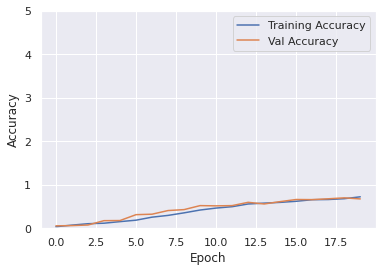

In [100]:
#Plot the accuracy
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Training Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val Accuracy')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)



Maximum validation accuracy:

In [101]:
print(max(history.history['val_accuracy']))

0.699999988079071


Maximum validation accuracy on basemodel is 69.999999 which is equal to 70%

#Data Augmentation

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This refers to randomly changing the images in ways that shouldn’t impact their interpretation, such as horizontal flipping, zooming, and rotating. This helps prevent overfitting and helps the model generalize better.


In [102]:
#Copying actual train and valid data to train3 and valid3 data
x_train3 = x_train.copy()
y_train3 = y_train.copy()
x_valid3 = x_valid.copy()
y_valid3 = y_valid.copy()

###ImageDataGenerator Class:
Configures random transformations and normalization operations to be done on your image data during training

In [103]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [104]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images ideally true
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train3)

After you have created and configured your ImageDataGenerator, you must fit it on your data. This will calculate any statistics required to actually perform the transforms to your image data. You can do this by calling the fit() function on the data generator and pass it your training dataset.

### Build the Model

In [105]:
# # modelling starts using a CNN.
model.reset_states()
tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (6,6),padding = 'Same',activation ='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(30, activation = "softmax"))

In [106]:
batch_size=128
epochs=200

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

###Compile the Model

In [107]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 96)          8

In [109]:
#Convert train and valid data to array
x_train3 = np.array(x_train3)
x_valid3 = np.array(x_valid3)

###Fit the Model

In [110]:
history_aug = model.fit_generator(datagen.flow(x_train3,y_train3, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_valid3,y_valid3),
                              verbose = 1, steps_per_epoch=x_train3.shape[0] // batch_size)


Epoch 1/200
8/8 [==============================] - 3s 415ms/step - loss: 3.3576 - accuracy: 0.0561 - val_loss: 3.3090 - val_accuracy: 0.0622
Epoch 2/200
8/8 [==============================] - 3s 390ms/step - loss: 3.1484 - accuracy: 0.1121 - val_loss: 2.9794 - val_accuracy: 0.1027
Epoch 3/200
8/8 [==============================] - 3s 393ms/step - loss: 2.8616 - accuracy: 0.1254 - val_loss: 2.8173 - val_accuracy: 0.0865
Epoch 4/200
8/8 [==============================] - 3s 404ms/step - loss: 2.6257 - accuracy: 0.1570 - val_loss: 2.5299 - val_accuracy: 0.1730
Epoch 5/200
8/8 [==============================] - 3s 408ms/step - loss: 2.5485 - accuracy: 0.1713 - val_loss: 2.5352 - val_accuracy: 0.1459
Epoch 6/200
8/8 [==============================] - 3s 388ms/step - loss: 2.4548 - accuracy: 0.1927 - val_loss: 2.4143 - val_accuracy: 0.1568
Epoch 7/200
8/8 [==============================] - 3s 390ms/step - loss: 2.3341 - accuracy: 0.2202 - val_loss: 2.2982 - val_accuracy: 0.2486
Epoch 8/200
8

### Plot Accuracy and Loss

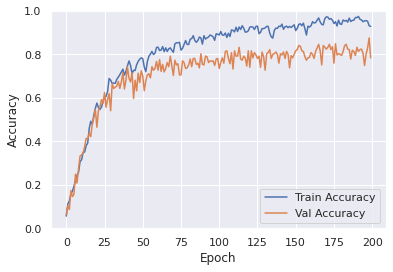

In [111]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val Accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history_aug)


### Validation Accuracy

In [112]:
print(max(history_aug.history['val_accuracy']))

0.8756756782531738


Maximum validation accuracy for the Data augmentation model is 87.5%

###Prediction

Prediction on new outside images

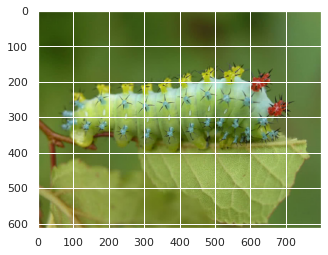

In [114]:
test_img1 = plt.imread("test1.jpg") 
test_img2 = plt.imread("caterpillar.jpg")
plt.imshow(test_img1)
plt.imshow(test_img2)


In [115]:
from skimage.transform import resize
resized_image = resize(test_img2, (32,32,3))
predictions = model.predict(np.array( [resized_image] ))

In [116]:
predictions.argmax(axis=1)

array([13])

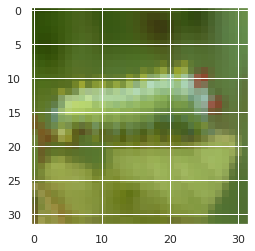

In [117]:
plt.imshow(resized_image)

#CONCLUSION

###  Analysis
  - Trained the CNN model using padding techniques 'same', kernel filters of size 6 by 6 , 3 by 3 and MAxpooling2D technique with size 2 by 2.Activation function used in hidden layers is RELU. As it is the multiclass classification which has 30 different classes, used softmax in the output layer with 30 neurons.
  - Baseline performace is approximately 5% as per the majority class rule.
  - From the Accuary plot of data augmentation, the training and validation data is increasing throughout the epochs. There is a small generalization error between validation accuracy and training accuracy.Obtained accuarcy of 87.5 % which exceeded baseline performance. So, the obtained accuarcy is 87.5% for 200 epochs.
